# Aprendizagem Automatica Avançada
### Trabalho Laboratorial No 2


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy.random as rd
from time import time


### Load data

In [3]:
D=pickle.load(open('xorData.p','rb'))

X = D['data']
y = D['target']

print(X.shape)
print(y.shape)


(2, 1000)
(1000,)


### Visualizar os dados

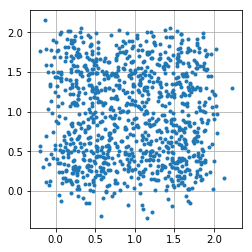

In [4]:
plt.plot(X[0],X[1], '.')
plt.axis('scaled')
plt.grid(True)

### (a) Implemente um algoritmo de treino da rede. Neste devera ser possıvel escolher o valor do passo de adaptacao, η, o termo de momento, α, bem como o numero de iteracoes de adaptacao.

### 1.1 Treinar o algoritmo com uma camada escondida 

In [5]:
def treinar_rede(X, y, nH, eta, alpha, Iter):
    W1=rd.randn(2,nH)*0.5
    b1=np.zeros(nH)
    b1=b1[:,np.newaxis]
    W2=rd.randn(nH)*.5
    W2=W2[:,np.newaxis]

    dzW1=np.zeros(W1.shape)
    dzb1=np.zeros(b1.shape)
    dzW2=np.zeros(W2.shape)
    Err=np.zeros(Iter)

    for i in range(Iter):
        U=np.dot(W1.T,X)+b1
        V=np.tanh(U)
        z=np.dot(W2.T,V)
        yh=np.tanh(z)

        #Erro
        E=y-yh
        Err[i]=np.mean(E**2)

        #gradientes
        dz=-2*E*(1-yh**2)
        dW2=np.dot(V,dz.T)
        dV=np.dot(W2,dz)
        dU=(1-V**2)*dV
        db1=np.mean(dU,axis=1)
        dW1=np.dot(X,dU.T)

        #termo de momento
        dzW1=dW1+alpha*dzW1
        dzb1=db1[:,np.newaxis]+alpha*dzb1
        dzW2=dW2+alpha*dzW2

        #adaptação
        
        W1=W1-eta*dzW1
        b1=b1-eta*dzb1
        W2=W2-eta*dzW2
        
    return Err, W1, b1, W2 


In [6]:
eta =1e-4
alpha=0.9
Iter=1500

Err, W1, b1, W2 = treinar_rede(X, y, nH=1, eta =1e-4, alpha=0.9, Iter=1500)
print(Err[-1])

0.22560500757870103


### B
#### Treine uma rede com uma unidade escondida. Execute varias vezes o treino de modo a escolher os valores que achar apropriados para η, α e para o numero de iteracoes.

### 1 Unidade Escondida

In [7]:
def best_parameters(unidades):
    erroMinimo = 0.23   # Baseado na primeira corrida
    best = []
    # saida = []

    for alpha in np.linspace(0.1, 0.9, 9):
        print(alpha)
        for iteer in [500, 1000, 1200, 1500]:
            for eta in np.linspace(1e-4, 9e-4, 9):
                Err, W1, b1, W2 = treinar_rede(X, y, nH=unidades, eta=eta, alpha=alpha, 
                                               Iter=iteer)

                if  erroMinimo > Err[-1]:
                    # print(Err[-1])
                    best = [eta, alpha, iteer]
                    erroMinimo = Err[-1]
                    saida = [Err, W1, b1, W2]
    return best, erroMinimo, saida
                
[eta, alpha, iteer], erroMinimo, [Err_1, W1, b1, W2] = best_parameters(unidades = 1)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


In [8]:
print("Melhores parametros: \neta:", eta, "\nalpha:", alpha, "\niteer:", iteer)
print("Menor erro:", erroMinimo)


Melhores parametros: 
eta: 0.0009 
alpha: 0.9 
iteer: 1500
Menor erro: 0.22040846633303085


#### Grafico da evolucao do erro ao longo do treino com os parametros escolhidos


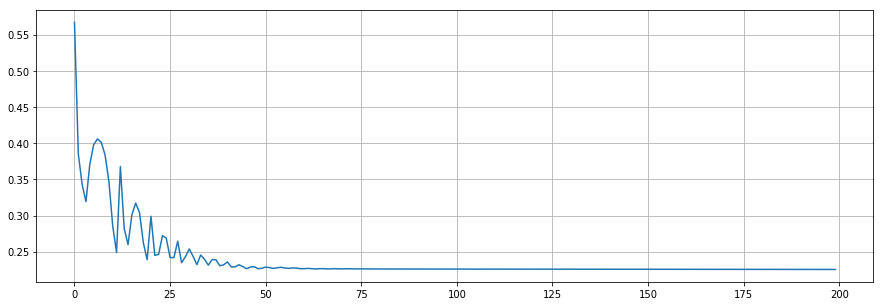

In [9]:
plt.figure(figsize=(15,5))
plt.plot(Err_1[:200])  # Apliacao
plt.grid(True)

In [10]:
# Estimar saídas com rede treinada

U=np.dot(W1.T, X) + b1
V=np.tanh(U)
z=np.dot(W2.T, V)
yh_1=np.tanh(z).squeeze()

Nº de erros: 500


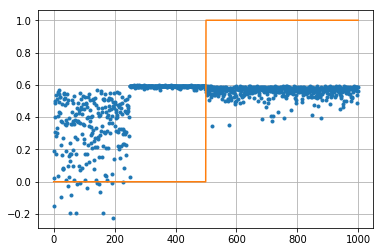

In [11]:
plt.plot(yh_1,'.')
plt.plot(y)
plt.grid(True)
ye=(yh_1>=0)*2-1
print('Nº de erros:',np.sum(y!=ye))

#### Visualize o conjunto de treino e os erros obtidos neste conjunto.

Nº de erros: 500


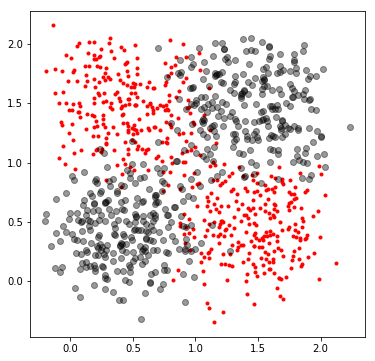

In [12]:
plt.figure(figsize=(6,6))
ye=(yh_1>=0)*2-1

plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.4)
print('Nº de erros:',np.sum(y!=ye))


#### Faca um grafico da funcao de saıda da rede, usando o comando plot wireframe, para uma grelha de 50 × 50 compreendida no intervalo [−1, 2]

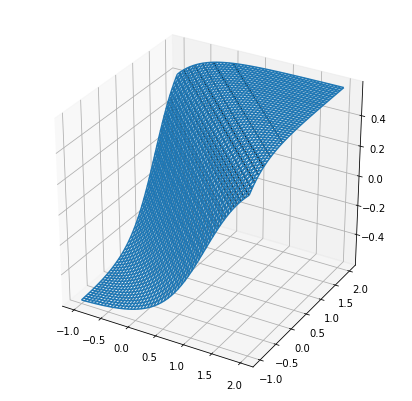

In [13]:
gX,gY=np.meshgrid(np.linspace(-1, 2, 50),np.linspace(-1, 2, 50))
X2=np.vstack((gX.ravel(),gY.ravel()))
U=np.dot(W1.T,X2)+b1
V=np.tanh(U)
z=np.dot(W2.T,V)
yh_1=np.tanh(z)
Yh_1=np.reshape(yh_1,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.contour3D(gX,gY,Yh_1,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh_1)

### (c) Repita a alinea 1.b) para uma rede com 10 unidades escondidas.

### 10 Unidades Escondidas

In [14]:
st=time()
[eta, alpha, iteer], erroMinimo, [Err_2, W1, b1, W2] = best_parameters(unidades = 10)
print("O tempo que o algoritmo demora e:", time()-st)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
O tempo que o algoritmo demora e: 189.57980489730835


In [15]:
print("Melhores parametros: \neta:", eta, "\nalpha:", alpha, "\niteer:", iteer)
print("Menor erro:", erroMinimo)


Melhores parametros: 
eta: 0.00019999999999999998 
alpha: 0.9 
iteer: 1000
Menor erro: 0.08609664384090637


#### Grafico da evolucao do erro ao longo do treino com os parametros escolhidos

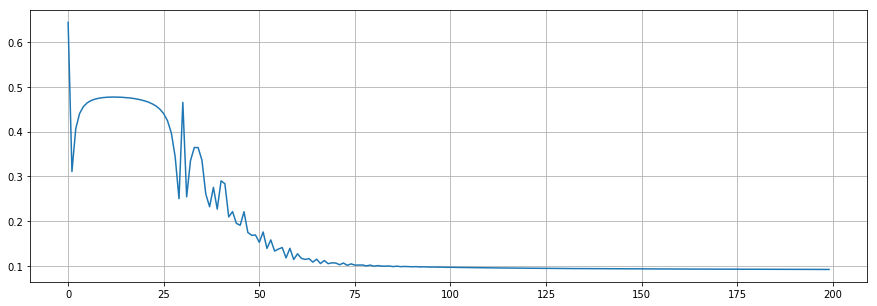

In [16]:
plt.figure(figsize=(15,5))
plt.plot(Err_2[:200])  # Apliacao
plt.grid(True)

In [17]:
# Estimar saídas com rede treinada

U=np.dot(W1.T, X) + b1
V=np.tanh(U)
z=np.dot(W2.T, V)
yh_2=np.tanh(z).squeeze()

Nº de erros: 500


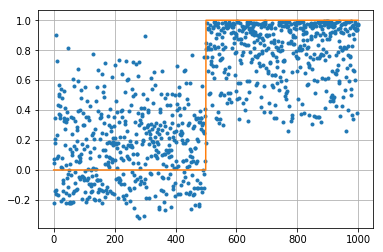

In [18]:
plt.plot(yh_2,'.')
plt.plot(y)
plt.grid(True)
ye=(yh_2>=0)*2-1
print('Nº de erros:',np.sum(y!=ye))

#### Visualize o conjunto de treino e os erros obtidos neste conjunto.

Nº de erros: 500


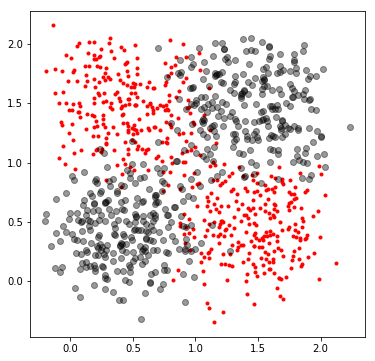

In [19]:
plt.figure(figsize=(6,6))
ye=(yh_2>=0)*2-1

plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.4)
print('Nº de erros:',np.sum(y!=ye))


#### Faca um grafico da funcao de saıda da rede, usando o comando plot wireframe, para uma grelha de 50 × 50 compreendida no intervalo [−1, 2]

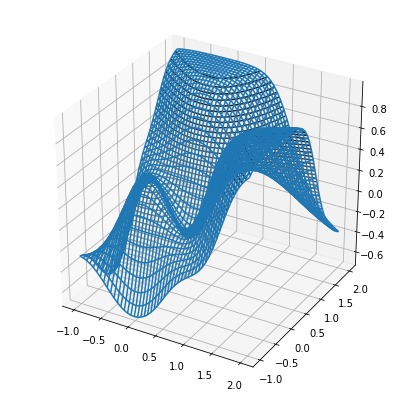

In [20]:
gX,gY=np.meshgrid(np.linspace(-1, 2, 50),np.linspace(-1, 2, 50))
X2=np.vstack((gX.ravel(),gY.ravel()))
U=np.dot(W1.T,X2)+b1
V=np.tanh(U)
z=np.dot(W2.T,V)
yh_2=np.tanh(z)
Yh_2=np.reshape(yh_2,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.contour3D(gX,gY,Yh_2,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh_2)

### (d) Repita a alınea 1.b) para uma rede com 50 unidades escondidas.

### 50 Unidades Escondidas

In [21]:
st=time()
[eta, alpha, iteer], erroMinimo, [Err_3, W1, b1, W2] = best_parameters(unidades = 50)

print("O tempo que o algoritmo demora e:", time()-st)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
O tempo que o algoritmo demora e: 496.5067322254181


In [22]:
print("Melhores parametros: \neta:", eta, "\nalpha:", alpha, "\n iteer:", iteer)
print("Menor erro:", erroMinimo)


Melhores parametros: 
eta: 0.0001 
alpha: 0.9 
 iteer: 1200
Menor erro: 0.08590781300479558


#### Grafico da evolucao do erro ao longo do treino com os parametros escolhidos

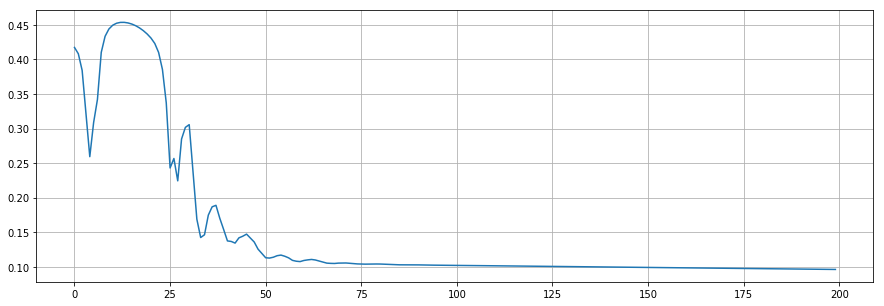

In [23]:
plt.figure(figsize=(15,5))
plt.plot(Err_3[:200])  # Apliacao
plt.grid(True)

In [24]:
# Estimar saídas com rede treinada

U=np.dot(W1.T, X) + b1
V=np.tanh(U)
z=np.dot(W2.T, V)
yh_3=np.tanh(z).squeeze()

Nº de erros: 500


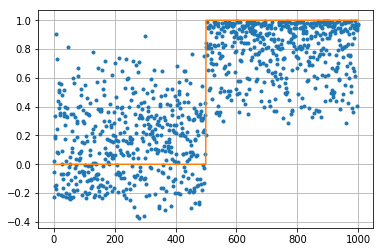

In [25]:
plt.plot(yh_3,'.')
plt.plot(y)
plt.grid(True)
ye=(yh_3>=0)*2-1
print('Nº de erros:',np.sum(y!=ye))

#### Visualize o conjunto de treino e os erros obtidos neste conjunto.

Nº de erros: 500


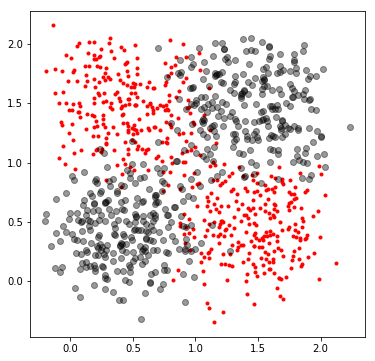

In [26]:
plt.figure(figsize=(6,6))
ye=(yh_3>=0)*2-1

plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.4)
print('Nº de erros:',np.sum(y!=ye))


#### Faca um grafico da funcao de saıda da rede, usando o comando plot wireframe, para uma grelha de 50 × 50 compreendida no intervalo [−1, 2]

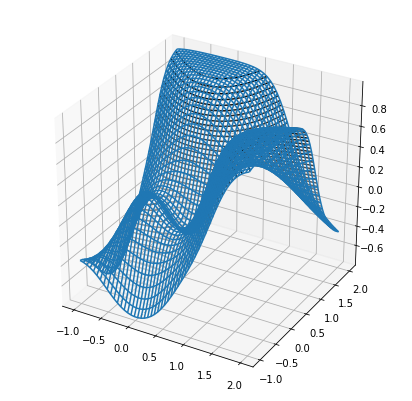

In [27]:
gX,gY=np.meshgrid(np.linspace(-1, 2, 50),np.linspace(-1, 2, 50))
X2=np.vstack((gX.ravel(),gY.ravel()))
U=np.dot(W1.T,X2)+b1
V=np.tanh(U)
z=np.dot(W2.T,V)
yh_3=np.tanh(z)
Yh_3=np.reshape(yh_3,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.contour3D(gX,gY,Yh_3,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh_3)

### A evolucao de todos os erros

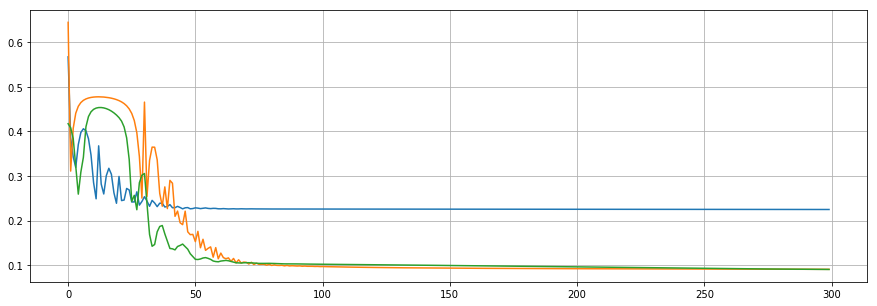

In [28]:
plt.figure(figsize=(15,5))

plt.plot(Err_1[:300])  # Apliacao
plt.plot(Err_2[:300])  # Apliacao
plt.plot(Err_3[:300])  # Apliacao
plt.grid(True)

## 2. Pretende-se implementar, treinar e testar varias redes MLP com a base de dados CIFAR-10
### (a) Treine e avalie uma rede MLP com 10 camadas escondidas e 100 unidade por camada. Use a func¸ao e RELU para as ativac¸ ˜ oes das camadas escondidas, a funcao softmax para a camada de saıda, e a otimizac¸ao Nadam.

In [1]:
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as rnd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load data
cifar10=keras.datasets.cifar10
(Xtrain,ytrain), (Xtest,ytest)=cifar10.load_data()

#imagens devem estar no formato de vetor
print("Shapes")

#shape deve ser (50000, 32*32) e (50000,)
print('Training set:\n',Xtrain.shape, ytrain.shape) 

# imagens with colors, convert to grayscale
print('Test set:\n', Xtest.shape, ytest.shape)


Shapes
Training set:
 (50000, 32, 32, 3) (50000, 1)
Test set:
 (10000, 32, 32, 3) (10000, 1)


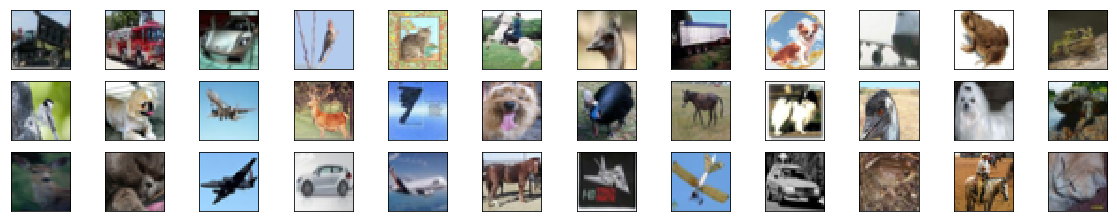

In [6]:
def plot_images(Xtrain):
    fig = plt.figure(figsize=(20,5))
    for i in range(36):
        ax = fig.add_subplot(4, 12, i + 1, xticks=[], yticks=[])
        ax.
        ax.imshow(np.squeeze(Xtrain[i]))
plot_images(Xtrain)

### Pre-Processamento

In [10]:
ytrain = ytrain.squeeze()
ytest = ytest.squeeze()

# Utilizar a funcao permutation() para fazer shuffle nos dados
idx = rnd.permutation(Xtrain.shape[0])
Xtrain = Xtrain[idx]
ytrain = ytrain[idx]

# Ordenar os dados de teste
idx = np.argsort(ytest)
Xtest = Xtest[idx]
ytest = ytest[idx]


#Transforma uma imagem a cores em cinzento (gray)
def to_gray(data):
    # Matriz temporaria de [50000, 32, 32]
    data_Gray = np.zeros((data.shape[0], data.shape[1], 
                          data.shape[2]))  
    
    for i in range(data.shape[0]):
         
        data_Gray[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY) 
    return data_Gray

XtrainGray = to_gray(Xtrain)
XtestGray = to_gray(Xtest)



# Modificar as dimensoes dos dados
X_train = XtrainGray.reshape((XtrainGray.shape[0], 
                              XtrainGray.shape[1]**2)) /255.
X_test = XtestGray.reshape((XtestGray.shape[0], 
                            XtestGray.shape[1]**2)) /255.

# Separar os dados de treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X_train, ytrain, 
                                                      train_size=0.6,
                                                      stratify=ytrain, 
                                                      random_state=42)

# Transformar os dados em vetores de label:
# Ex. 5 -> [0,0,0,0,1,0,0,0,0,0]
ytrainB = keras.utils.to_categorical(y_train)
yvalidB = keras.utils.to_categorical(y_valid)
ytestB  = keras.utils.to_categorical(ytest)




-- [0.85098039 0.89019608 0.91372549 ... 0.14117647 0.21960784 0.45882353]


In [3]:
print(X_valid.shape)
print(yvalidB.shape)

print(X_train.shape)
print(ytrainB.shape)

print(X_test.shape)
print(ytestB.shape)

##########################
print()
print(X_valid.shape)
print(yvalidB.shape)

#print(X1p.shape)
print(ytrainB.shape)

#print(X2p.shape)
print(ytestB.shape)


(20000, 1024)
(20000, 10)
(30000, 1024)
(30000, 10)
(10000, 1024)
(10000, 10)

(20000, 1024)
(20000, 10)
(30000, 10)
(10000, 10)


### Criar a rede neuronal

In [4]:
nn = keras.Sequential()

nn.add(keras.layers.Flatten(input_shape=(1024, )))

nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dense(100, activation="relu"))

nn.add(keras.layers.Dense(10, activation="softmax"))


# early_stopping = EarlyStopping( 
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20,            # how many epochs to wait before stopping
#     restore_best_weights=True, 
# )

# Compilador
nn.compile(optimizer="nadam", 
           loss="categorical_crossentropy", 
           metrics=["accuracy"])
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
____

In [5]:
# Treinar o modelo
train = nn.fit(X_train, ytrainB, 
               epochs=100, 
               batch_size=500,
               validation_data=(X_test, ytestB))

Train on 30000 samples, validate on 10000 samples
Epoch 1/100
30000/30000 [==============================] - 1s 49us/sample - loss: 2.7826 - acc: 0.1660 - val_loss: 2.1442 - val_acc: 0.2077
Epoch 2/100
30000/30000 [==============================] - 1s 34us/sample - loss: 2.1317 - acc: 0.2131 - val_loss: 2.1252 - val_acc: 0.2063
Epoch 3/100
30000/30000 [==============================] - 1s 31us/sample - loss: 2.0754 - acc: 0.2391 - val_loss: 2.0399 - val_acc: 0.2627
Epoch 4/100
30000/30000 [==============================] - 1s 30us/sample - loss: 2.0288 - acc: 0.2613 - val_loss: 1.9997 - val_acc: 0.2766
Epoch 5/100
30000/30000 [==============================] - 1s 31us/sample - loss: 1.9825 - acc: 0.2805 - val_loss: 1.9893 - val_acc: 0.2806
Epoch 6/100
30000/30000 [==============================] - 1s 35us/sample - loss: 1.9954 - acc: 0.2740 - val_loss: 1.9915 - val_acc: 0.2814
Epoch 7/100
30000/30000 [==============================] - 1s 38us/sample - loss: 1.9315 - acc: 0.3006 - val_l

### Ver a evolucao do modelo

In [15]:
h['val_loss'][0]

2.1442259192466735

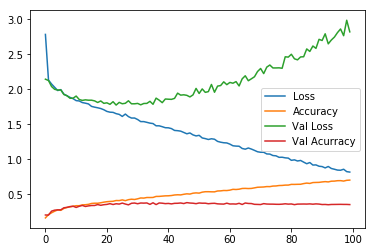

In [6]:
h = train.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["acc"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_acc"], label='Val Acurracy')
plt.legend()
plt.show()


### Prever labels

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

#Predictions on the test set
yOut = nn.predict(X_test)

#The predicted outputs have to be converted back to integer labels (0-9)
ytestPred = np.argmax(yOut,axis=1)

print('Total number of erros:',np.sum(ytest!=ytestPred))
print("\nMatriz de confusao:\n", confusion_matrix(ytest, ytestPred))

print(X_test.shape, ytestB.shape)
print(classification_report(ytest,ytestPred))

#nn.evaluate(X_test, ytestB)

Total number of erros: 6438

Matriz de confusao:
 [[435  39  56  31  77  36  63  47 175  41]
 [ 62 419  19  34  39  37  56  34 138 162]
 [133  20 223 106 146 117 101  79  58  17]
 [ 62  30  85 203  80 205 130  96  50  59]
 [111  32 126  67 302  81 107  90  59  25]
 [ 59  20  83 188  88 321  69  89  52  31]
 [ 60  43  77 115 125  90 348  75  29  38]
 [ 74  36  42  73 101  94  49 419  53  59]
 [151  66  22  45  40  36  23  47 506  64]
 [ 65 147  32  52  35  47  49  66 121 386]]
(10000, 1024) (10000, 10)
              precision    recall  f1-score   support

           0       0.36      0.43      0.39      1000
           1       0.49      0.42      0.45      1000
           2       0.29      0.22      0.25      1000
           3       0.22      0.20      0.21      1000
           4       0.29      0.30      0.30      1000
           5       0.30      0.32      0.31      1000
           6       0.35      0.35      0.35      1000
           7       0.40      0.42      0.41      1000
      

In [9]:
nn.evaluate(X_test, ytestB)

10000/10000 [==============================] - 0s 41us/sample - loss: 2.8192 - acc: 0.3562


[2.8191541900634767, 0.3562]

### (b) Treine uma rede MLP a sua escolha tendo como objetivo chegar a uma probabilidade de acerto acima dos 50% no conjunto de teste. Tenha em conta os seguinte pontos:


In [13]:
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy.random as rnd
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import EarlyStopping
from time import time



# Load data
cifar10=keras.datasets.cifar10
(Xtrain,ytrain), (Xtest,ytest)=cifar10.load_data()

#imagens devem estar no formato de vetor
print("Shapes")

#shape deve ser (50000, 32*32) e (50000,)
print('Training set:\n',Xtrain.shape, ytrain.shape) 

# imagens with colors, convert to grayscale
print('Test set:\n', Xtest.shape, ytest.shape)


ytrain = ytrain.squeeze()
ytest = ytest.squeeze()

# Utilizar a funcao permutation() para fazer shuffle nos dados
idx = rnd.permutation(Xtrain.shape[0])
Xtrain = Xtrain[idx]
ytrain = ytrain[idx]

# Ordenar os dados de teste
idx = np.argsort(ytest)
Xtest = Xtest[idx]
ytest = ytest[idx]


#Transforma uma imagem a cores em cinzento (gray)
def to_gray(data):
    # Matriz temporaria de [50000, 32, 32]
    data_Gray = np.zeros((data.shape[0], data.shape[1], 
                          data.shape[2]))  
    
    for i in range(data.shape[0]):
         
        data_Gray[i] = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY) 
    return data_Gray

XtrainGray = to_gray(Xtrain)
XtestGray = to_gray(Xtest)


# Modificar as dimensoes dos dados
X_train = XtrainGray.reshape((XtrainGray.shape[0], 
                              XtrainGray.shape[1]**2)) * 1.0
X_test = XtestGray.reshape((XtestGray.shape[0], 
                            XtestGray.shape[1]**2)) * 1.0


# Separar os dados de treino e validacao
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, ytrain, 
#                                                       train_size=0.6,
#                                                       stratify=ytrain, 
#                                                       random_state=42)

# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = ytrain[5000:], ytrain[:5000]


ytrainB = keras.utils.to_categorical(y_train)
yvalidB = keras.utils.to_categorical(y_valid)
ytestB  = keras.utils.to_categorical(ytest)





Shapes
Training set:
 (50000, 32, 32, 3) (50000, 1)
Test set:
 (10000, 32, 32, 3) (10000, 1)


#### Pode pre-processar os dados (ex.: standard scalar, PCA)


print(X2p.shape, ytestB.shape, X1p.shape, ytrainB.shape)

### Criar rede neuronal

In [ ]:
st=time()
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' # don't show info messages


from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

print("PCA")

n_com = 70
pca=PCA(n_components=n_com, whiten=True).fit(X_train, ytrainB)

# components- extrax todos os componentes temos de por 0.99999
X1p=pca.transform(X_train)
X2p=pca.transform(X_test)




early_stopping = EarlyStopping( 
    min_delta=0.005, # minimium amount of change to count as an improvement
    patience=30,            # how many epochs to wait before stopping
    restore_best_weights=True, 
)
#early_stopping = EarlyStopping(monitor='val_loss', patience=10)

nn = keras.Sequential()

nn.add(keras.layers.Flatten(input_shape=(n_com, )))
activ = "relu"
num_neuro = 150

for i in range(1, 11):
    nn.add(keras.layers.Dense(num_neuro, activation=activ))
    nn.add(keras.layers.Dropout(0.2))
    


# nn.add(keras.layers.Dense(50, activation=activ))
nn.add(keras.layers.Dense(10, activation="softmax"))


# Compilador
nn.compile(optimizer="nadam", 
           loss="categorical_crossentropy", 
           metrics=["accuracy"])


#nn.summary()

print("Trainning ...")
# Treinar o modelo
train = nn.fit(X1p, ytrainB, 
               epochs = 70, 
               batch_size = 64,
               validation_data = (X2p, ytestB),
               callbacks = [early_stopping], # put your callbacks in a list
               verbose = 0)  # turn off training lo)

print("\n\n######################")
print(nn.evaluate(X1p, ytrainB))
print(nn.evaluate(X2p, ytestB))
print("O tempo que o algoritmo demora e:", time()-st)
print("O tempo que o algoritmo demora e:", (time()-st) / 60 )



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
h=train.history
ax1.plot(h["loss"], label='Loss')
ax1.plot(h["val_loss"], label='Val Loss')
ax1.legend()

ax2.plot(h["acc"], label='Accuracy')
ax2.plot(h["val_acc"], label='Val Acurracy')
# ax2.axis([1, 100])
ax2.axis(xmin=-1,ymax=1)
ax2.axhline(y=.5, color='r')
ax2.legend()



plt.show()

PCA
Trainning ...


In [ ]:
print(nn.evaluate(X1p, ytrainB))
print(nn.evaluate(X2p, ytestB))

### Predict

In [6]:
#Predictions on the test set
yOut=nn.predict(X2p)

#The predicted outputs have to be converted back to integer labels (0-9)
ytestPred=np.argmax(yOut, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

print('Total number of erros:', np.sum(ytest != ytestPred))
print("\nMatriz de confusao:\n", confusion_matrix(ytest, ytestPred))

#print(X_test.shape, ytest.shape)


print("\n\nClassification_report:\n", classification_report(ytest,ytestPred))
nn.evaluate(X2p, ytestB)

Total number of erros: 5451

Matriz de confusao:
 [[455  38 101  21  88   6  41  19 170  61]
 [ 17 506   4  28  27   2  82  15  90 229]
 [ 68  19 276  76 237  74 146  39  37  28]
 [ 24  29  68 212 161 132 220  50  20  84]
 [ 51  12 117  40 491  22 152  60  24  31]
 [ 21   8  80 214 137 304 114  67  17  38]
 [ 17  46  31  63 159  11 609  14  18  32]
 [ 18   7  36  55 173  65  42 494  14  96]
 [ 98  82  15  33  38   9  30  12 607  76]
 [ 18 143   6  52  23   8  59  22  74 595]]


Classification_report:
               precision    recall  f1-score   support

           0       0.58      0.46      0.51      1000
           1       0.57      0.51      0.54      1000
           2       0.38      0.28      0.32      1000
           3       0.27      0.21      0.24      1000
           4       0.32      0.49      0.39      1000
           5       0.48      0.30      0.37      1000
           6       0.41      0.61      0.49      1000
           7       0.62      0.49      0.55      1000
      

[1.5487964038848876, 0.4549]